In [0]:
# Get yourself set up
import requests as r
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Empty list to store scraped attributes
names = []
numbers = []
ages = []
positions = []
hometowns = []
heights = []
weights = []

In [0]:
# Scrape html content
url = 'https://www.lafc.com/players'
response = r.get(url)
html = response.text
soup = BeautifulSoup(html)
lafc_players_rows = soup.find('ul', class_ = 'player_list list-reset')
players = soup.find_all('li', class_='row')

# Place specific player attributes into corresponding lists
for player in players:
  if player.find('div', class_='name'):
    names.append(player.find('a', class_='name_link').text)         
  if player.find('span', class_='jersey'):
    numbers.append(player.find('span', class_='jersey').text)
  if player.find('div', class_='birthdate'):
    ages.append(player.find('span', class_='stat age').text)
  if player.find('span', class_='position'):
    positions.append(player.find('span', class_='position').text)
  if player.find('div', class_='hometown'):
    hometowns.append(player.find('div', class_='hometown').text)
  if player.find('span', class_='stat height'):
    heights.append(player.find('span', class_='stat height').text)
  if player.find('span', class_='stat weight'):
    weights.append(player.find('span', class_='stat weight').text)

In [4]:
# Spot validate
print(len(names))
print(len(numbers))
print(len(ages))
print(len(positions))
print(len(hometowns))
print(len(heights))
print(len(weights))
print(names)
print(numbers)
print(ages)
print(positions)
print(hometowns)
print(heights)
print(weights)

23
23
23
23
23
23
23
['Eduard Atuesta', 'Tristan Blackmon', 'Latif Blessing', 'José Cifuentes', 'Adama Diomande', 'Mohamed El-Munir', 'Francisco Ginella', 'Alejandro Guido', 'Jordan Harvey', 'Dejan Jaković', 'Mark-Anthony Kaye', 'Tyler Miller', 'Danny Musovski', 'Diego Palacios', 'Josh Pérez', 'Adrien Perez', 'Brian Rodríguez', 'Diego Rossi', 'Eddie Segura', 'Danilo Silva', 'Pablo Sisniega', 'Carlos Vela', 'Walker Zimmerman']
['20', '27', '7', '', '99', '13', '', '15', '2', '5', '14', '1', '', '12', '18', '26', '17', '9', '4', '6', '23', '10', '25']
['22', '23', '23', '20', '29', '27', '20', '25', '35', '34', '25', '26', '24', '20', '21', '24', '19', '21', '22', '33', '24', '30', '26']
['Midfielder', 'Defender', 'Forward/Midfielder', 'Midfielder', 'Forward', 'Defender', 'Midfielder', 'Midfielder', 'Defender', 'Defender', 'Midfielder', 'Goalkeeper', 'Forward', 'Defender', 'Forward', 'Forward', 'Forward', 'Forward', 'Defender', 'Defender', 'Goalkeeper', 'Forward', 'Defender']
['Vélez, Co

In [6]:
# Turn Weights into Int
weight_int = [int(x) for x in weights]
weight_int

[157,
 178,
 140,
 155,
 180,
 154,
 160,
 170,
 176,
 176,
 170,
 205,
 160,
 143,
 140,
 170,
 150,
 143,
 155,
 154,
 175,
 162,
 196]

In [7]:
# Turn lists into DataFrame
zipped_lists = list(zip(names, numbers, ages, positions, hometowns, heights, weights))
data = pd.DataFrame(zipped_lists, columns=['Names', 'Numbers', 'Ages', 'Positions', 'Hometowns', 'Heights', 'Weights'])
data.head()
data = data.set_index('Names')
data.head()

,Numbers,Ages,Positions,Hometowns,Heights,Weights
Names,,,,,,
Eduard Atuesta,20,22,Midfielder,"Vélez, Colombia","5' 11""",157
Tristan Blackmon,27,23,Defender,"Las Vegas, NV","6' 1""",178
Latif Blessing,7,23,Forward/Midfielder,"Accra, Ghana","5' 3""",140
José Cifuentes,,20,Midfielder,"Esmeraldas, Ecuador","5' 8""",155
Adama Diomande,99,29,Forward,"Oslo, Norway","5' 11""",180


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1243: RuntimeWarning: invalid value encountered in sqrt
  dx = np.sqrt(d ** 2 - dy ** 2) * 1.05


Text(0.5, 1.0, 'LAFC Player Weight by Position')

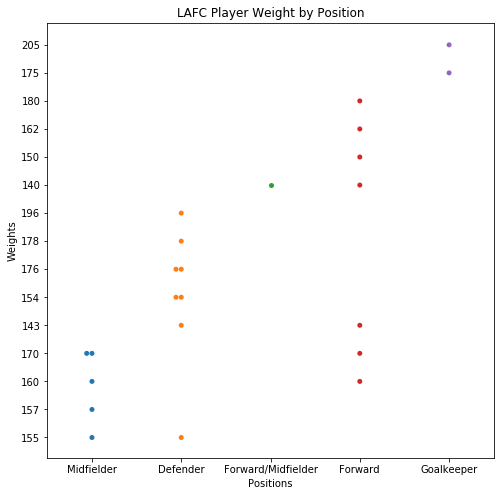

In [8]:
# Explore Player Weights by Position
plt.figure(figsize=(8,8))
sns.swarmplot(x='Positions', y='Weights', data=data)
plt.title('LAFC Player Weight by Position')